<a href="https://colab.research.google.com/github/bado94/DataScience/blob/master/facebookprophet_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
!pip install pystan~=2.14

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pystan-2.19.1.1.tar.gz (16.2 MB)
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp39-cp39-linux_x86_64.whl size=61826428 sha256=78b8fd2471d72389fcf06154812539eb9001ae1f5c72c324caad0818bc8938f7
  Stored in directory: /root/.cache/pip/wheels/b8/36/bf/7ec7e363f796373cea3eb9ea94e83f5bbbb586d2edbf7e3417
Successfully built pystan
  Attempting uninstall: pystan
    Found existing installation: pystan 3.6.0
    Uninstalling pystan-3.6.0:
      Successfully uninstalled pystan-3.6.0


In [2]:
! pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9436085 sha256=e88cd24a291d79bd9b48adb8c170f51e5ea115acd3045d482cb4eaa4cc07e537
  Stored in directory: /root/.cache/pip/wheels/da/a4/bb/dbed5db92b2183a753dd96cc8a56706a61484ff3959988bdaa
Successfully built fbprophet


In [3]:
#import libraries
import itertools
from fbprophet import Prophet
import pandas as pd
import numpy as np

In [4]:
print(dir(itertools))

['__doc__', '__loader__', '__name__', '__package__', '__spec__', '_grouper', '_tee', '_tee_dataobject', 'accumulate', 'chain', 'combinations', 'combinations_with_replacement', 'compress', 'count', 'cycle', 'dropwhile', 'filterfalse', 'groupby', 'islice', 'permutations', 'product', 'repeat', 'starmap', 'takewhile', 'tee', 'zip_longest']


In [8]:
#get the data
data = pd.read_csv("/content/drive/MyDrive/Data_Science/Dataset/daily-bike-sharing-1.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [9]:
data["holiday"].value_counts()

0    710
1     21
Name: holiday, dtype: int64

In [12]:
data.shape[0]/365.5

2.0

In [13]:
#select variables
dataset = data.loc[:, ["dteday","cnt", "holiday", "workingday", "weathersit",
                       "temp", "atemp", "hum", "windspeed"]]
dataset.head(5)                       

,dteday,cnt,holiday,workingday,weathersit,temp,atemp,hum,windspeed
0,2011-01-01,985,0,0,2,0.344167,0.363625,0.805833,0.160446
1,2011-01-02,801,0,0,2,0.363478,0.353739,0.696087,0.248539
2,2011-01-03,1349,0,1,1,0.196364,0.189405,0.437273,0.248309
3,2011-01-04,1562,0,1,1,0.200000,0.212122,0.590435,0.160296
4,2011-01-05,1600,0,1,1,0.226957,0.229270,0.436957,0.186900


In [14]:
dataset.dtypes

dteday         object
cnt             int64
holiday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
dtype: object

#Data Transformation

In [15]:
#Date variable
dataset.dteday = pd.to_datetime(dataset.dteday,
                                format = "%Y-%m-%d")
dataset.dteday

0     2011-01-01
1     2011-01-02
2     2011-01-03
3     2011-01-04
4     2011-01-05
         ...    
726   2012-12-27
727   2012-12-28
728   2012-12-29
729   2012-12-30
730   2012-12-31
Name: dteday, Length: 731, dtype: datetime64[ns]

In [16]:
#renaming variable
dataset = dataset.rename(columns = {'cnt' : 'y'})
dataset = dataset.rename(columns = {'dteday' : 'ds'})
dataset.head()

,ds,y,holiday,workingday,weathersit,temp,atemp,hum,windspeed
0,2011-01-01,985,0,0,2,0.344167,0.363625,0.805833,0.160446
1,2011-01-02,801,0,0,2,0.363478,0.353739,0.696087,0.248539
2,2011-01-03,1349,0,1,1,0.196364,0.189405,0.437273,0.248309
3,2011-01-04,1562,0,1,1,0.200000,0.212122,0.590435,0.160296
4,2011-01-05,1600,0,1,1,0.226957,0.229270,0.436957,0.186900


#holidays

In [19]:
holiday_dates = dataset[dataset["holiday"] == 1].ds
holiday_dates

16    2011-01-17
51    2011-02-21
104   2011-04-15
149   2011-05-30
184   2011-07-04
247   2011-09-05
282   2011-10-10
314   2011-11-11
327   2011-11-24
359   2011-12-26
366   2012-01-02
380   2012-01-16
415   2012-02-20
471   2012-04-16
513   2012-05-28
550   2012-07-04
611   2012-09-03
646   2012-10-08
681   2012-11-12
691   2012-11-22
724   2012-12-25
Name: ds, dtype: datetime64[ns]

In [20]:
#we use lower and upper window for holidays
#lower_window = -3 means 3 days before the holiday starts
#upper_window = 1 means 1 day after holiday starts
holidays = pd.DataFrame({'holiday' : 'holi',
                         'ds': pd.to_datetime(holiday_dates),
                         'lower_window': -3,
                         'upper_window': 1})
holidays.head()

,holiday,ds,lower_window,upper_window
16,holi,2011-01-17,-3,1
51,holi,2011-02-21,-3,1
104,holi,2011-04-15,-3,1
149,holi,2011-05-30,-3,1
184,holi,2011-07-04,-3,1


In [21]:
#removing holiday column
dataset = dataset.drop(columns = "holiday")
dataset.head()
# dataset.pop("holiday")
# dataset.head()

,ds,y,workingday,weathersit,temp,atemp,hum,windspeed
0,2011-01-01,985,0,2,0.344167,0.363625,0.805833,0.160446
1,2011-01-02,801,0,2,0.363478,0.353739,0.696087,0.248539
2,2011-01-03,1349,1,1,0.196364,0.189405,0.437273,0.248309
3,2011-01-04,1562,1,1,0.200000,0.212122,0.590435,0.160296
4,2011-01-05,1600,1,1,0.226957,0.229270,0.436957,0.186900


#Training and Test Set

In [22]:
#Training and test set
test_days = 31
training_set = dataset.iloc[:-test_days, :]
test_set = dataset.iloc[-test_days:, :]
test_set.tail(1)

,ds,y,workingday,weathersit,temp,atemp,hum,windspeed
730,2012-12-31,2729,1,2,0.215833,0.223487,0.5775,0.154846


In [23]:
training_set.shape

(700, 8)

In [24]:
test_set.shape

(31, 8)

In [25]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [26]:
?Prophet.add_country_holidays

#Facebook Prophet

In [45]:
#Facebook Prophet model
model = Prophet(growth = "linear",
            yearly_seasonality = True,
            weekly_seasonality = True,
            daily_seasonality = False,
            holidays = holidays,
            seasonality_mode = "multiplicative",
            seasonality_prior_scale = 10,
            holidays_prior_scale = 10,
            changepoint_prior_scale = 0.05)
model.add_regressor('workingday')
model.add_regressor('weathersit')
model.add_regressor('temp')
model.add_regressor('atemp')
model.add_regressor('hum')
model.add_regressor('windspeed')
# regressor added to model

In [46]:
model.fit(training_set)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


#forecasting 

In [47]:
#Create Future Dataframe
future = model.make_future_dataframe(periods = 31,
                                 freq = "D")
future.tail()

,ds
726,2012-12-27
727,2012-12-28
728,2012-12-29
729,2012-12-30
730,2012-12-31


In [48]:
#merge regressors
future = pd.concat([future, dataset.iloc[:,2:]],
                   axis = 1)
future.tail()

,ds,workingday,weathersit,temp,atemp,hum,windspeed
726,2012-12-27,1,2,0.254167,0.226642,0.652917,0.350133
727,2012-12-28,1,2,0.253333,0.255046,0.590000,0.155471
728,2012-12-29,0,2,0.253333,0.242400,0.752917,0.124383
729,2012-12-30,0,1,0.255833,0.231700,0.483333,0.350754
730,2012-12-31,1,2,0.215833,0.223487,0.577500,0.154846


In [49]:
#forecast
forecast = model.predict(future)
forecast.head()

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,atemp,atemp_lower,atemp_upper,extra_regressors_multiplicative,...,workingday,workingday_lower,workingday_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2011-01-01,1787.145260,107.122020,1884.006633,1787.145260,1787.145260,-0.041196,-0.041196,-0.041196,-0.303224,...,0.00000,0.00000,0.00000,-0.266150,-0.266150,-0.266150,0.0,0.0,0.0,1010.087156
1,2011-01-02,1796.371017,-83.889568,1804.615422,1796.371017,1796.371017,-0.044664,-0.044664,-0.044664,-0.308228,...,0.00000,0.00000,0.00000,-0.258409,-0.258409,-0.258409,0.0,0.0,0.0,828.825231
2,2011-01-03,1805.596775,203.242626,1914.647875,1805.596775,1805.596775,-0.102302,-0.102302,-0.102302,-0.097096,...,0.13614,0.13614,0.13614,-0.249397,-0.249397,-0.249397,0.0,0.0,0.0,1076.221222
3,2011-01-04,1814.822533,277.062043,2067.425281,1814.822533,1814.822533,-0.094334,-0.094334,-0.094334,-0.089601,...,0.13614,0.13614,0.13614,-0.239233,-0.239233,-0.239233,0.0,0.0,0.0,1167.649855
4,2011-01-05,1824.048291,397.520893,2233.602307,1824.048291,1824.048291,-0.088320,-0.088320,-0.088320,-0.016119,...,0.13614,0.13614,0.13614,-0.228060,-0.228060,-0.228060,0.0,0.0,0.0,1313.358551


In [50]:
#predictions
predictions_prophet = forecast.yhat[-test_days:].rename("prophet")
predictions_prophet

700    4168.381667
701    3513.149698
702    5694.659147
703    5700.099570
704    5396.841236
705    4865.852963
706    3989.252480
707    4218.760765
708    3328.791166
709    3748.259166
710    3726.352820
711    4045.263414
712    5023.204900
713    4748.112102
714    5171.169338
715    3355.030660
716    3655.483332
717    4869.054297
718    4548.385887
719    3774.925031
720    2928.209638
721    3608.482549
722    3602.099360
723    2613.565416
724    2174.776435
725     285.266747
726    2110.848064
727    3282.757625
728    3063.447207
729    3022.914330
730    2907.586170
Name: prophet, dtype: float64

#Visualization

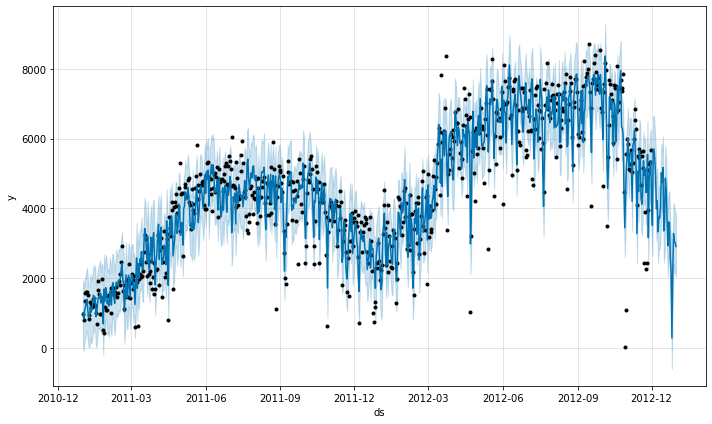

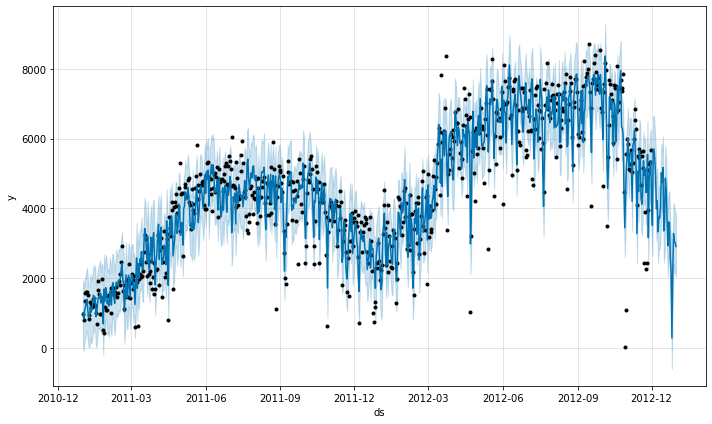

In [43]:
model.plot(forecast)

In [51]:
d = data[["dteday","cnt"]]
d.head()
te = test_set[["ds"]]
te["prediciton"] = predictions_prophet



<ipython-input-51-c2856742d365>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  te["prediciton"] = predictions_prophet


In [52]:
te.head(5)

,ds,prediciton
700,2012-12-01,4168.381667
701,2012-12-02,3513.149698
702,2012-12-03,5694.659147
703,2012-12-04,5700.099570
704,2012-12-05,5396.841236


In [53]:
te.dtypes

ds            datetime64[ns]
prediciton           float64
dtype: object

In [54]:
d["dteday"] = pd.to_datetime(d["dteday"])
d.dtypes

<ipython-input-54-641ef236bc33>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d["dteday"] = pd.to_datetime(d["dteday"])


dteday    datetime64[ns]
cnt                int64
dtype: object

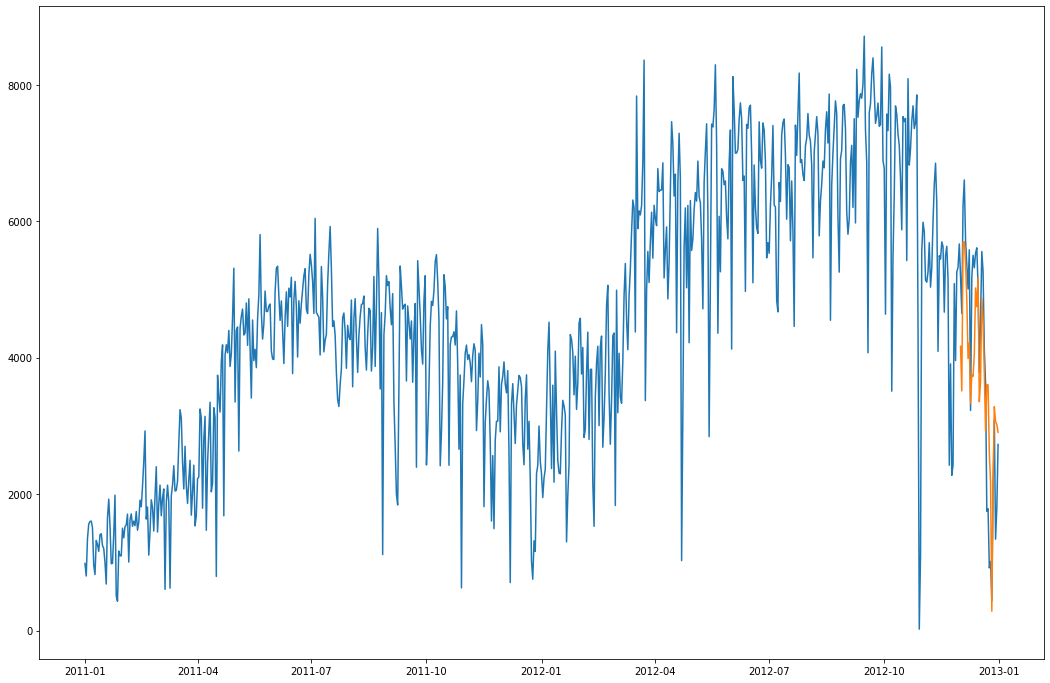

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,12))
plt.plot(d["dteday"],d["cnt"])
plt.plot(te["ds"],te["prediciton"])
plt.show()

/usr/local/lib/python3.9/dist-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

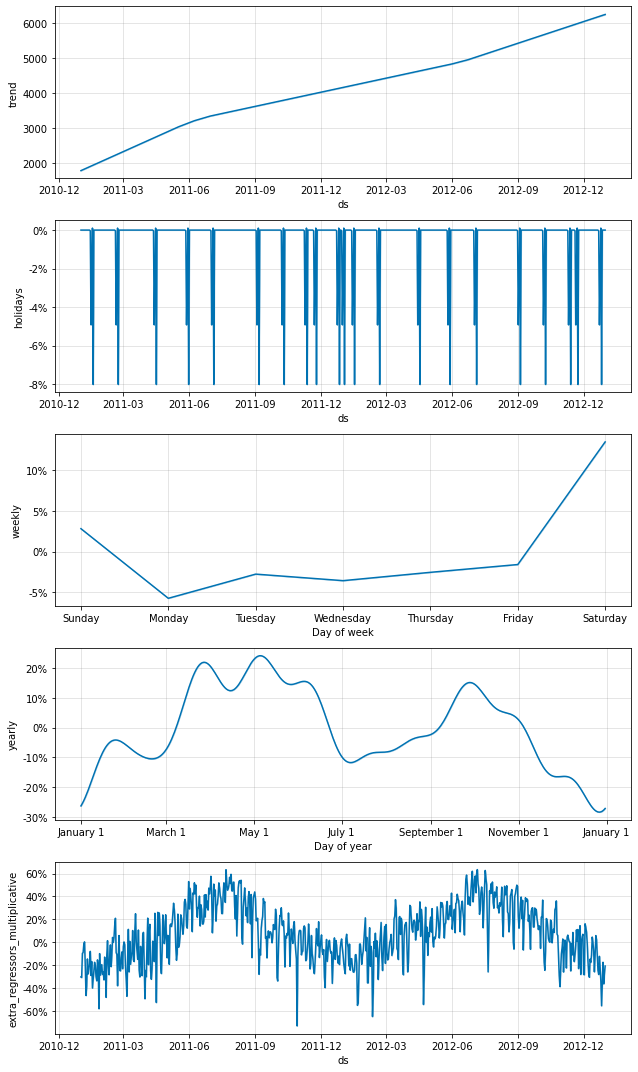

In [40]:
#plot components
model.plot_components(forecast);

#Model assessment

In [41]:
#MAE and RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(round(mean_absolute_error(test_set['y'], predictions_prophet),0))
print(round(np.sqrt(mean_squared_error(test_set['y'], predictions_prophet)), 0))

862.0
1027.0


In [42]:
#MAPE function
def MAPE(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
MAPE(test_set['y'], predictions_prophet)

34.75157013748966